# Корреляция

In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')
bikes = pd.read_pickle('Data/BikesDataImputed.pkl')
bikes.head(n=3)

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0


In [2]:
# Сгруппироем данные по неделям

bikes_week = bikes \
    .groupby(bikes['Date'].dt.isocalendar().week) \
    .agg({'Temperature': 'mean', 'Rental Count': 'sum'})

In [3]:
# Сначала делаем расчеты на примере
first_five = bikes_week.iloc[:5]

In [4]:
first_five['X - Mx'] = first_five['Temperature'] - first_five['Temperature'].mean()
first_five['Y - My'] = first_five['Rental Count'] - first_five['Rental Count'].mean()

In [5]:
first_five

,Temperature,Rental Count,X - Mx,Y - My
week,,,,
1,-2.694940,39441,1.465357,6641.2
2,-5.079762,30871,-0.919464,-1928.8
3,2.662500,42193,6.822798,9393.2
4,-10.038690,23079,-5.878393,-9720.8
5,-5.650595,28415,-1.490298,-4384.8


In [6]:
# Находим суммы квадратов

SSx = (first_five['X - Mx']**2).sum()
SSy = (first_five['Y - My']**2).sum()
SP = (first_five['X - Mx'] * first_five['Y - My']).sum()
print(f'SSx = {SSx}\nSSy = {SSy}\nSP = {SP}')

SSx = 86.31974305555556
SSy = 249778436.8
SP = 139270.43345238097


In [7]:
r = SP / np.sqrt(SSx * SSy)
print(r)

0.9484760874616524


In [8]:
first_five['Temperature'].corr(first_five['Rental Count'])

0.9484760874616526

In [9]:
# Коэффициент корреляции через Numpy

np.corrcoef(first_five['Temperature'], first_five['Rental Count'])[0][1]

0.9484760874616526

In [10]:
# Коэффициент корреляции через Pandas

bikes_week['Temperature'].corr(bikes_week['Rental Count'])

0.8458075200534891

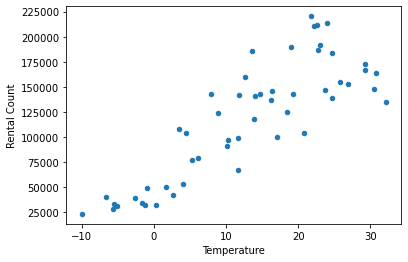

In [11]:
bikes_week.plot('Temperature','Rental Count', kind='scatter');

In [12]:
bikes.corr()

,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Holiday,Functioning Day,Rental Count,Normal Humidity,Good Weather
Hour,1.000000e+00,0.123610,-0.241644,0.285197,0.008715,-0.021516,-1.391486e-16,0.005439,0.345622,0.107503,0.073698
Temperature,1.236105e-01,1.000000,0.159793,-0.036418,0.050758,-0.217846,-5.570102e-02,-0.049849,0.454749,0.025467,0.206979
Humidity,-2.416438e-01,0.159793,1.000000,-0.336683,0.236397,0.108183,-5.027765e-02,-0.020800,-0.169085,-0.285947,-0.115874
Wind speed,2.851967e-01,-0.036418,-0.336683,1.000000,-0.019674,-0.003554,2.301677e-02,0.005037,0.097583,0.074964,0.032127
Rainfall,8.714642e-03,0.050758,0.236397,-0.019674,1.000000,0.008500,-1.426911e-02,0.002055,-0.103519,-0.095339,-0.042127
Snowfall,-2.151645e-02,-0.217846,0.108183,-0.003554,0.008500,1.000000,-1.259072e-02,0.032089,-0.120869,-0.067939,-0.054942
Holiday,-1.391486e-16,-0.055701,-0.050278,0.023017,-0.014269,-0.012591,1.000000e+00,-0.027624,-0.068822,-0.020156,0.029008
Functioning Day,5.439377e-03,-0.049849,-0.020800,0.005037,0.002055,0.032089,-2.762445e-02,1.000000,0.173437,0.002488,-0.101806
Rental Count,3.456218e-01,0.454749,-0.169085,0.097583,-0.103519,-0.120869,-6.882160e-02,0.173437,1.000000,0.128521,0.194224
Normal Humidity,1.075026e-01,0.025467,-0.285947,0.074964,-0.095339,-0.067939,-2.015629e-02,0.002488,0.128521,1.000000,0.440102


In [6]:
bikes_week = bikes.groupby(by=bikes['Date'].dt.isocalendar().week).agg({'Temperature': 'mean', 
                                                                        'Rental Count': 'sum',
                                                                        'Humidity': 'mean',
                                                                        'Wind speed': 'mean',
                                                                       })

In [7]:
bikes_week.corr().style.apply(lambda x: ["background: red" if (v > x.iloc[0]) else "" for v in x], axis = 1)

,Temperature,Rental Count,Humidity,Wind speed
Temperature,1.000000,0.845808,0.584642,-0.420474
Rental Count,0.845808,1.000000,0.389963,-0.434142
Humidity,0.584642,0.389963,1.000000,-0.456225
Wind speed,-0.420474,-0.434142,-0.456225,1.000000


In [8]:
bikes_week.corr()['Rental Count'].sort_values(ascending=False)

Rental Count    1.000000
Temperature     0.845808
Humidity        0.389963
Wind speed     -0.434142
Name: Rental Count, dtype: float64

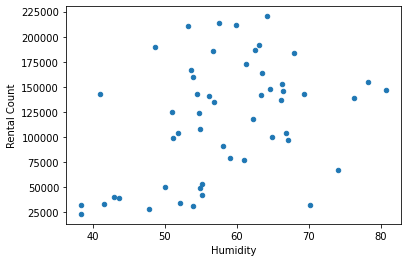

In [9]:
bikes_week.plot('Humidity','Rental Count', kind='scatter');

In [12]:
# Примедем значения к числам по модулю

bikes_week.corr()['Rental Count'].apply(np.abs).sort_values(ascending=False)[1:]
# bikes_week.corr()['Rental Count'].abs().sort_values(ascending=False)

Temperature    0.845808
Wind speed     0.434142
Humidity       0.389963
Name: Rental Count, dtype: float64

In [19]:
corr = bikes_week.corr().abs()
corr = corr.unstack().reset_index()
corr.columns = ['col_0', 'col_1', 'corr_foef']
corr = corr.query('corr_foef < 1').drop_duplicates(subset='corr_foef')

corr.sort_values('corr_foef', ascending=False)

,col_0,col_1,corr_foef
1,Temperature,Rental Count,0.845808
2,Temperature,Humidity,0.584642
11,Humidity,Wind speed,0.456225
7,Rental Count,Wind speed,0.434142
3,Temperature,Wind speed,0.420474
6,Rental Count,Humidity,0.389963
